# Predicting heart disease using machine learning

This notebook looks into using varius Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of prediction whether or not someone has heart disease based on their medical attributes.

Approach:
1. Data
2. Evaluation
3. Features
4. Modelling
5. Experimentation


## Data
Came from here: https://archive.ics.uci.edu/dataset/45/heart+disease

## Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project

## Features
    
**Create data dictionary**

 1. (age) Years       

 2. (sex) 1 = male, 0 = female       

 3. (cp) - chest pain type

    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
   

 4. (trestbps) Resting blood pressure

 5. (chol) Serum cholestoral in mg/dl      

 6. (fbs) Fasting blood sugar (fbs > 120 mg/dl) (1 = true, 0 = false)       

 7. (restecg) Resting electrocardiographic results

 8. (thalach) maximum heart rate achieved   

 9. (exang) exercise induced angina (1 = yes; 0 = no)     

 10. (oldpeak) ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

 11. (slope) the slope of the peak exercise ST segment

    0: Upsloping: better heart rate with excercise (uncommon)
    1: Flatsloping: minimal change (typical healthy heart)
    2: Downslopins: signs of unhealthy heart


 12. (ca) number of major vessels (0-3) colored by flourosopy

    colored vessel means the doctor can see the blood passing through
    the more blood movement the better (no clots)
        

 13. (thal) thalium stress result

    1,3: normal
    6: fixed defect: used to be defect but ok now
    7: reversable defect: no proper blood movement when excercising
    

 14. (target) - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools
Pandas, matplotlib, numpy for data analysis and manipulation

In [79]:
# Import tools

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Want plots to appear in the notebook
%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve,RocCurveDisplay

## Load Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data Exploration (exploratory data analysis or EDA)

Goal is to better understand the data

1. What questions are you trying to solve?
2. What kind of dat do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change, or remove features to get more out of your data?

In [3]:
# Lets find out how many of each class we have
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

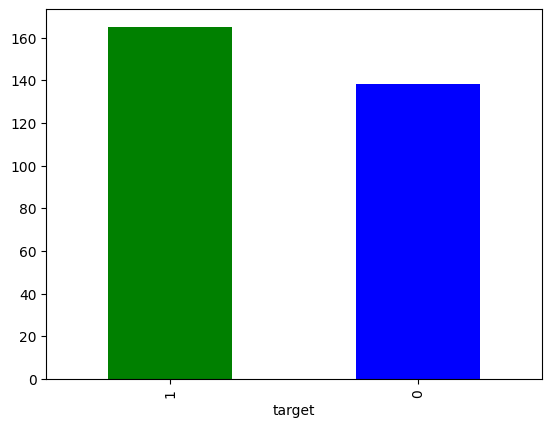

In [4]:
df['target'].value_counts().plot(kind = 'bar', color = ['green', 'blue'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to sex

In [8]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [9]:
# Compare target column to sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


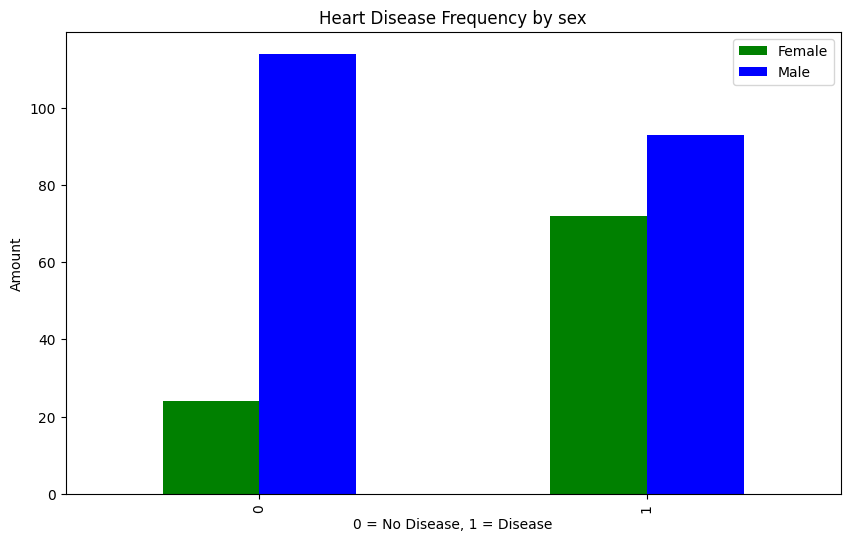

In [10]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind = 'bar', figsize = (10, 6), color = ['green', 'blue'])
plt.title('Heart Disease Frequency by sex')
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(['Female', 'Male'])

### Age vs Max Heart Rate for Heart Disease

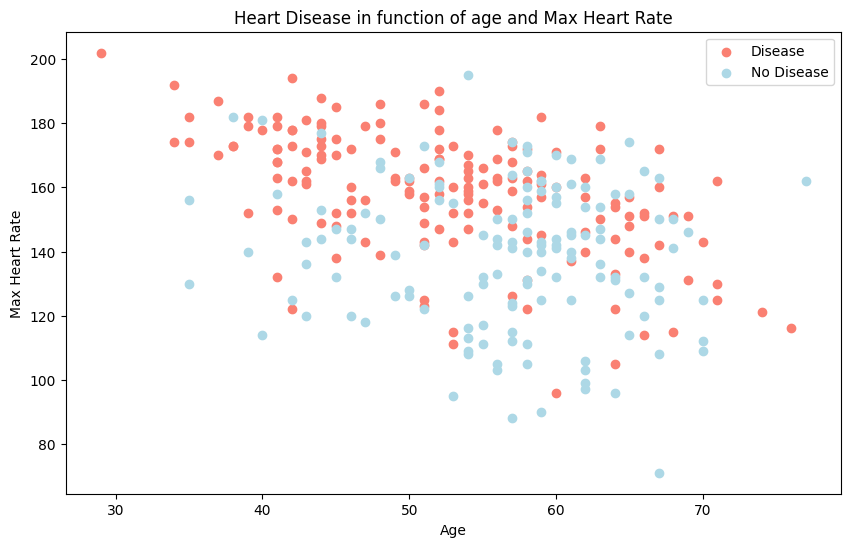

In [11]:
# Create a figure
plt.figure(figsize = (10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], c = 'salmon') # People with heart disease

# Scatter with negative examples
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], c = 'lightblue'); # People without heart disease

# Add some healpful info
plt.title('Heart Disease in function of age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease']);

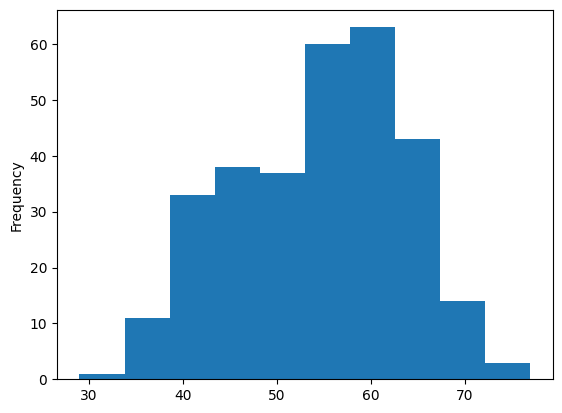

In [12]:
# Check distribution of the age column with a histogram
# It is a good way to find outliers. Like if someone was 150 years old...remove it
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain Type
(cp) - chest pain type

    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [13]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


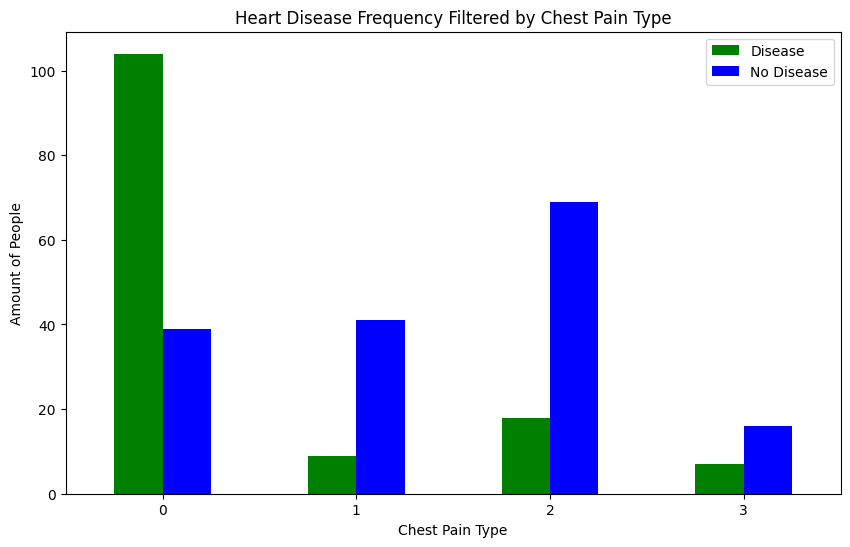

In [14]:
pd.crosstab(df.cp, df.target).plot(kind = 'bar', figsize = (10, 6), color = ['green', 'blue'])
plt.title("Heart Disease Frequency Filtered by Chest Pain Type")
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount of People')
plt.legend(['Disease', 'No Disease']);
plt.xticks(rotation = 0);

In [15]:
# Correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


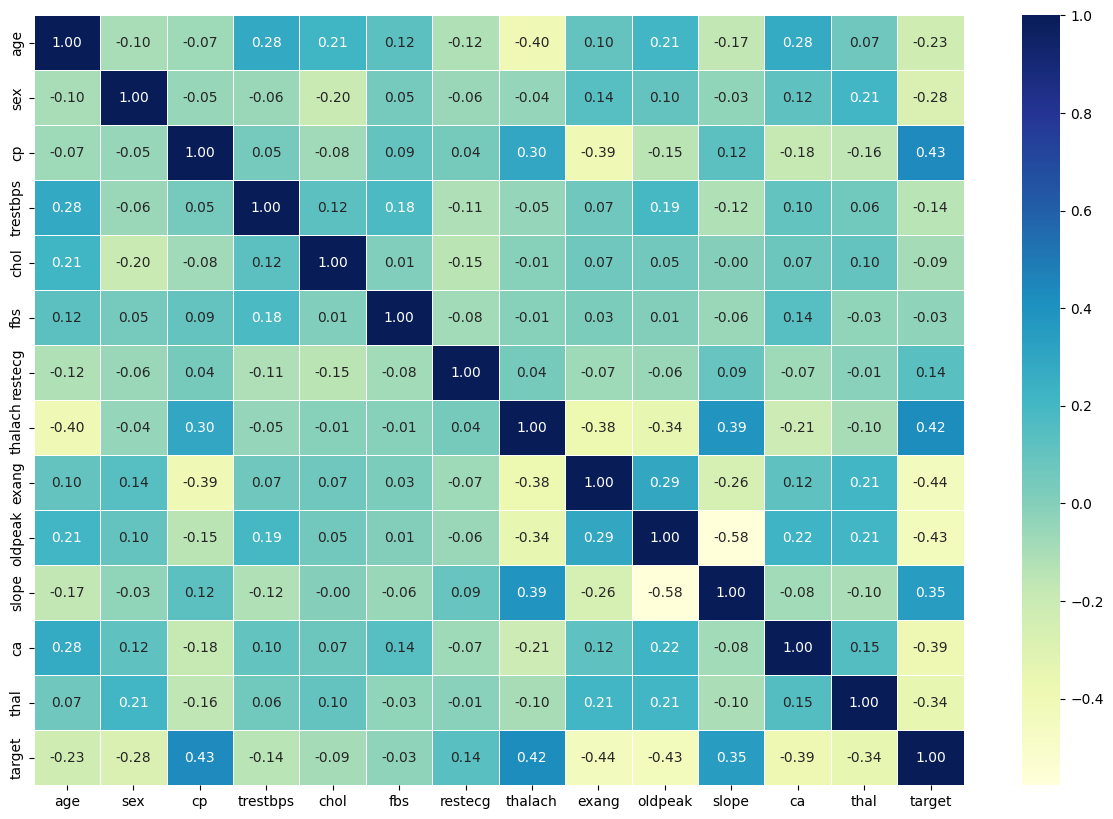

In [16]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix, annot = True, linewidths = .5, fmt = ".2f", cmap = "YlGnBu")

## Modelling 

In [17]:
# Split data into X and y
X = df.drop('target', axis = 1)
y = df['target']

In [18]:
# Split into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Test on three different models:
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [19]:
# Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
        'KNN': KNeighborsClassifier(),
        'Random Forest': RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given machine learning models
    '''
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        #Evaluate the model and append the score to model_score
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [20]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

C:\Users\avysk\Desktop\Code\Machine-Learning\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

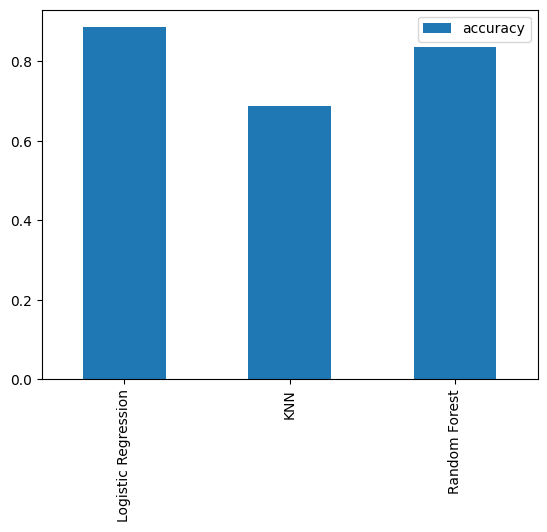

In [21]:
model_compare = pd.DataFrame(model_scores, index = ['accuracy'])
model_compare.T.plot.bar();

## Tuning/improving by hand

* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision 
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

In [22]:
# Tuning KNN by hand

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit and algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [23]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [24]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Max score achived by KNN was  75.41%


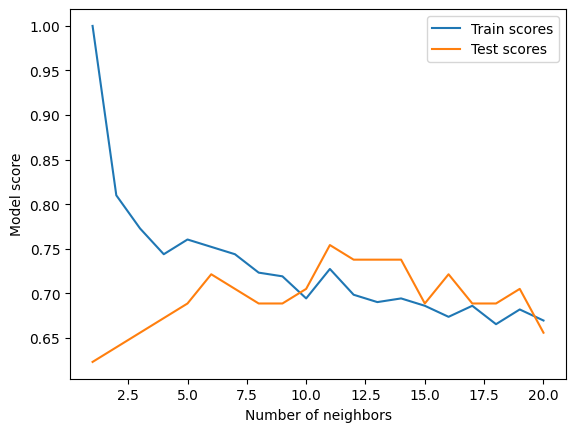

In [25]:
plt.plot(neighbors, train_scores, label = 'Train scores')
plt.plot(neighbors, test_scores, label = 'Test scores')
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend();
print(f"Max score achived by KNN was {max(test_scores) * 100: .2f}%")

## Hyperparameter tuning with RandomizedSearchCV

* LogisticRegression()
* RandomForestClassifier()


In [26]:
# Create a hyperparameter grid for Logistic regression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
              "solver": ['liblinear']}

# Create a hyperparameter grid for Randomforestclassifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
          'max_depth': [None, 3, 5, 10],
          'min_samples_split': np.arange(2, 20, 2),
          'min_samples_leaf': np.arange(1, 20, 2)}

In [27]:
np.random.seed(42)

# Setup hyperparameter search for logisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv = 5, n_iter = 20, verbose = True)

# Fit random hyperparameter search model for logistic regression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [28]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [29]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [30]:
np.random.seed(42)

# Setup hyperparameter search for randomforest
rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv = 5, n_iter = 20, verbose = True)

# Fit random hyperparameter search model for randomforest
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [31]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [32]:
rs_rf.score(X_test, y_test)

0.8688524590163934

## Hyperparameter Tuning with gridsearchCV

In [33]:
# Different hyperparameters for our logistic regression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
              "solver": ['liblinear']}

# Setup grid search
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                         cv = 5,
                         verbose = True)
# Fit the model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [34]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [35]:
# Evaluate
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating tuned machine learning classifier beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1 score

and use cross validation where possible

In [36]:
# make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [37]:
# Make predictions with probabilities
y_probs = gs_log_reg.predict_proba(X_test)
y_probs[:10]

y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.13274732, 0.75591506, 0.81452427, 0.05469222, 0.88453361,
       0.87070294, 0.60512181, 0.00435981, 0.01376377, 0.56138473])

In [38]:
# Plot ROC curve and calculate AUC metric
# Calculate fpr, tpr, and thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)


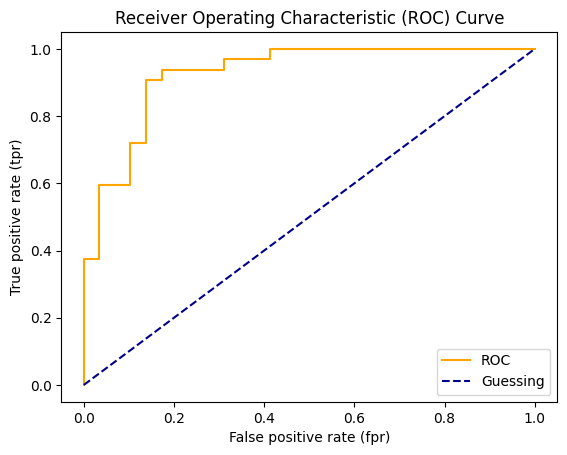

In [39]:
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
    # Plot the line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color = 'darkblue', linestyle = '--', label = 'Guessing')
    
    # Customize the plot
    plt.xlabel('False positive rate (fpr)')
    plt.ylabel('True positive rate (tpr)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [40]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.925646551724138

In [41]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


In [42]:
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    '''
    Plots a confusion matrix using seaborns heatmap
    '''
    fig, ax = plt.subplots(figsize = (3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot = True, linewidths = .5, fmt = ".2f", cmap = "YlGnBu")
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 

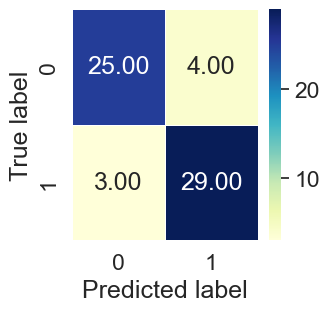

In [43]:
plot_conf_mat(y_test, y_preds)

Time for 
* Classification report
* Precision
* Recall
* F1 score

In [44]:
# Classification report
# This is not fully accurate because it is only done on one set. Better to use cross validation
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

Will use `cross_val_score`

In [45]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [46]:
# Create a new classifier with best parameters
clf = LogisticRegression(C = 0.20433597178569418, solver = 'liblinear')

In [59]:
# Cross validated accuracy
cv_acc = cross_val_score(clf, X, y, cv = 5, scoring = 'accuracy')
np.mean(cv_acc)

0.8479781420765027

In [60]:
# Cross validated precision
cv_pre = cross_val_score(clf, X, y, cv = 5, scoring = 'precision')
np.mean(cv_pre)

0.8215873015873015

In [61]:
# Cross validated recall
cv_rec = cross_val_score(clf, X, y, cv = 5, scoring = 'recall')
np.mean(cv_rec)

0.9272727272727274

In [62]:
# Cross validated F1
cv_f1 = cross_val_score(clf, X, y, cv = 5, scoring = 'f1')
np.mean(cv_f1)

0.8705403543192143

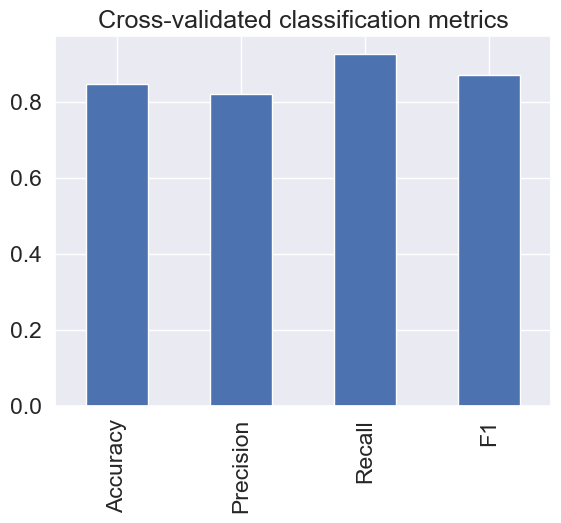

In [69]:
# Visualize cross validated metrics
cv_metrics = pd.DataFrame({'Accuracy': np.mean(cross_val_score(clf, X, y, cv = 5, scoring = 'accuracy')),
                          'Precision': np.mean(cross_val_score(clf, X, y, cv = 5, scoring = 'precision')),
                          'Recall': np.mean(cross_val_score(clf, X, y, cv = 5, scoring = 'recall')),
                          'F1': np.mean(cross_val_score(clf, X, y, cv = 5, scoring = 'f1'))},
                         index = [0])
cv_metrics.T.plot.bar(title = 'Cross-validated classification metrics', legend = False);

### Feature Importance

Which features contributed most to the outcomes of the model and how did they contribute? Finding feature importance is different for each model. Look up "MODEL NAME feature importance"

Below is for logistic regressions

In [70]:
clf = LogisticRegression(C = 0.20433597178569418, solver = 'liblinear')

clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [71]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044622,  0.66067059, -0.01156993, -0.00166374,
         0.04386122,  0.31275815,  0.02459361, -0.60413062, -0.5686283 ,
         0.45051625, -0.63609881, -0.67663383]])

In [76]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [75]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672775089892488,
 'sex': -0.8604462193284903,
 'cp': 0.6606705857793441,
 'trestbps': -0.01156993031867032,
 'chol': -0.0016637442407918324,
 'fbs': 0.04386122408903933,
 'restecg': 0.31275815497333875,
 'thalach': 0.024593612835517458,
 'exang': -0.6041306248075571,
 'oldpeak': -0.5686282991341255,
 'slope': 0.4505162464116119,
 'ca': -0.6360988070697587,
 'thal': -0.6766338279094292}

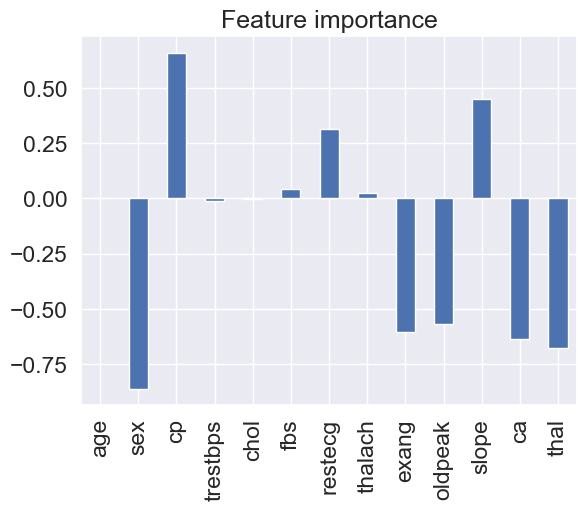

In [78]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title = 'Feature importance', legend = False);

# Experimentation

If it isn't good enough:

* Could you collect more data?
* Could you try a better model? Like Catboost or XGBoost? (GradientBoostingClassifier())
* Could you improve the current models (beyond what I did)

If model is good enough:
* Export it and share it with pickle